In [ ]:
!pip install git+git://github.com/scikit-learn/scikit-learn.git

In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm # 폰트 설정을 위한 라이브러리
import scipy
import os
import tarfile
from six.moves import urllib
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
# from sklearn.preprocessing import 
from pandas.plotting import scatter_matrix
fm.get_fontconfig_fonts()
font_location = 'C:/Windows/Fonts/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font',family=font_name)

%matplotlib inline
#sans-serif

In [2]:
DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml/master/'
HOUSING_PATH = os.path.join('datasets', 'housing')
HOUSING_URL = DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'   

# DOWNLOAD_ROOT = 다운로드 할 사이트 주소
# HOUSING_PATH = 다운로드 파일 저장 경로 설정
# HOUSING_URL = 다운로드 할 tgz url

def fetch_housing_data(housing_url = HOUSING_URL , housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
        
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()
    return tgz_path
    
# fetch_housing_data
# os.path.isdir(x) = x의 경로가 존재하는지 체크하는 함수
# os.makedirs(x) = x라는 디렉토리 생성
# urllib.request.urlretrieve(x,y)
# request = url에 접근하는 함수
# urlretrieve = x 에 접근하여 y라는 경로에 다운로드한다.

def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [3]:
x = os.path.join('abc', 'def')

In [4]:
fetch_housing_data()

'datasets\\housing\\housing.tgz'

In [5]:
housing = load_housing_data()

In [6]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info() # 데이터에 대한 간략한 설명 출력, null 값이나 데이터의 타입을 빠르게 확인 할 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing.ocean_proximity.value_counts() # 명목형 변수는 value_counts 로 쉽게 확인 할 수 있다.

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


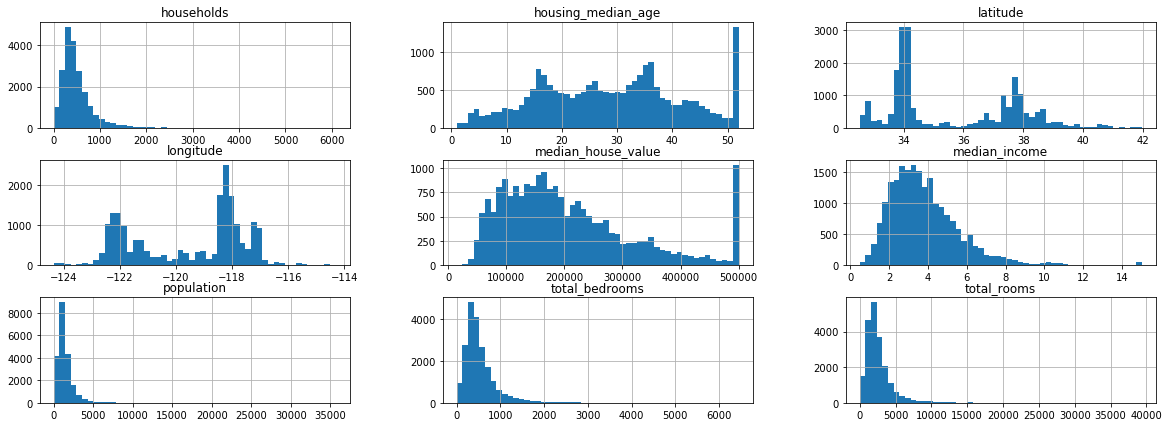

In [10]:
housing.hist(bins = 50 , figsize=(20,7)) # 시각화를 통해 쉽게 데이터의 형태를 확인 할 수 있다. 범주형은 알아서 뺴서 시각화한다. 
plt.show()

In [11]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    
    return data.iloc[train_indices], data.iloc[test_indices]

# np.random.permutation(x) = x 는 숫자, ex) x가 10이면 10미만의 정수들을 랜덤하게 가져온다.
# 이 방법은 데이터의 식별값이 없으므로 데이터가 추가된다면 문제가 될 수 있다.


In [12]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state = 42)

In [13]:
display(len(train_set))
display(len(test_set))

16512

4128

In [14]:
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)

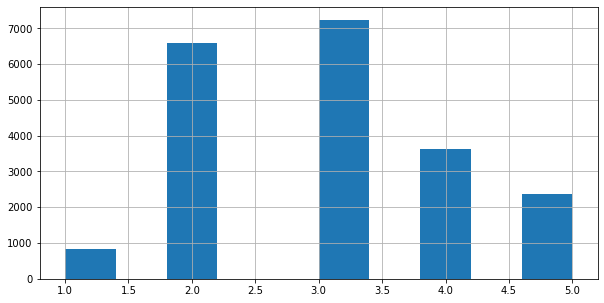

In [15]:
housing['income_cat'].hist(bins = 10 , figsize=(10,5))

In [16]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) # 층화 추출
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [17]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace = True) # income_cat 열을 제거

In [18]:
housing = strat_test_set.copy()

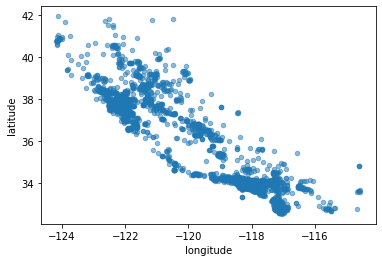

In [19]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha = 0.5) # alpha 는 밀집된 영역을 잘 표현해주는 옵션이다

In [20]:
matplotlib.matplotlib_fname()

'c:\\users\\sungyun\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

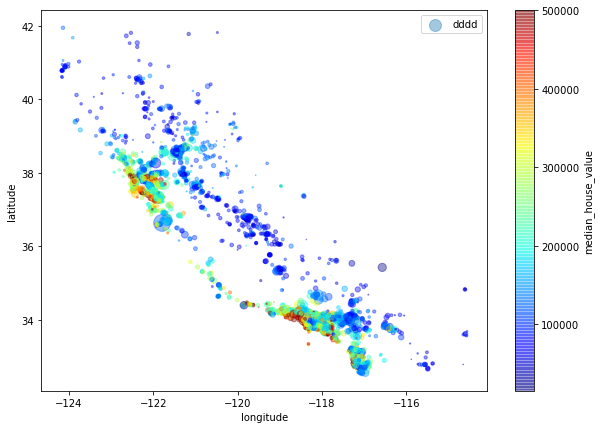

In [21]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s = housing['population']/100, label = 'dddd', figsize =(10, 7), c = 'median_house_value',
            cmap = plt.get_cmap('jet'), colorbar = True, sharex = False)

plt.legend()

In [22]:
corr_matrix = housing.corr()

In [23]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.691831
total_rooms           0.131435
housing_median_age    0.071357
households            0.071242
total_bedrooms        0.057568
population           -0.016033
longitude            -0.039987
latitude             -0.150124
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000219BFFF7708>,
      dtype=object)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


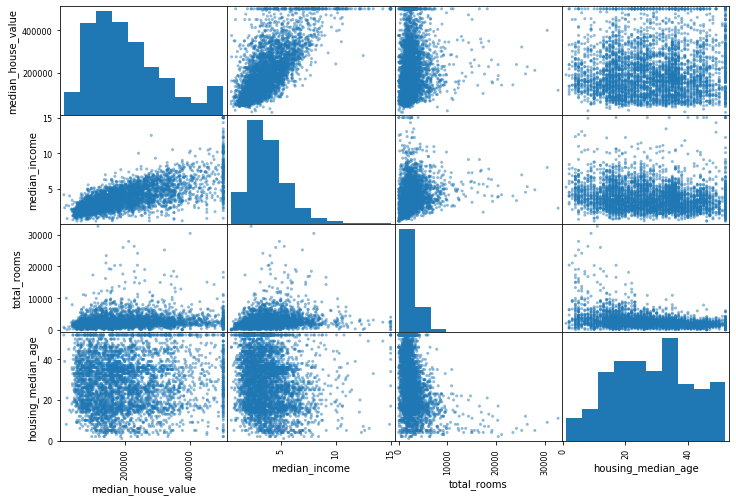

In [24]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,8))

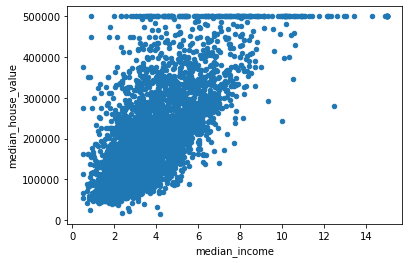

In [25]:
housing.plot(kind='scatter', x = 'median_income', y = 'median_house_value')

In [26]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households'] # 가구당 방 개수
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms'] # 전채 방 개수중에 침실 비율 
housing['population_per_household'] = housing['population']/housing['households'] # 가구당 인원 수

In [27]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.691831
rooms_per_household         0.192575
total_rooms                 0.131435
housing_median_age          0.071357
households                  0.071242
total_bedrooms              0.057568
population                 -0.016033
longitude                  -0.039987
population_per_household   -0.135142
latitude                   -0.150124
bedrooms_per_room          -0.240362
Name: median_house_value, dtype: float64

위와 같이 특성을 조합을 해 더 좋은 결과를 얻어 낼 수 있다. 무조건 좋다는 건 아니지만 여러 방법을 반복하여 좋은 결과를 내는 과정인듯하다.

In [28]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [29]:
housing.dropna(subset = ['total_bedrooms'])
housing.drop('total_bedrooms', axis=1)
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median, inplace = True)

# 결측치 제거 없애는 여러가지 방법

In [30]:
imputer = SimpleImputer(strategy='median')  # 누락된 값을 손쉽게 다루는 라이브러리 strategy에 누락된 값에 넣을 값을 설정한다.
housing_num = housing.drop('ocean_proximity', axis=1) # 텍스트 특성인 컬럼은 제외해준다.
imputer.fit(housing_num) # 훈련 데이터에 적용

# 추정기

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [31]:
imputer.statistics_ # 각 특성의 중간값을 계산해 그 결과를 객체의 statistics_ 에 저장한다.

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [32]:
imputer.strategy

'median'

In [33]:
X = imputer.transform(housing_num) # 학습된 imputer 객체를 사용해 훈련세트에서 누락된 값을 median으로 바굴 수 있다.
# 변환기

In [34]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index = list(housing.index.values))

In [35]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [36]:
housing_cat = housing['ocean_proximity']
housing_cat.head()

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
Name: ocean_proximity, dtype: object

In [37]:
housing_cat.value_counts()

<1H OCEAN     7276
INLAND        5263
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

In [38]:
# 대부분의 머신러닝 알고리즘은 숫자형을 다루기 때문에 이 카테로리는 텍스트를 숫자로 바꿔주어야한다.
# 각 카테고리를 다른 정숫값으로 매핑해주는 pandas 의 factorize() 메서드를 사용한다.
housing_cat_encoded , housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]

# <1H OCEAN -> 0

array([0, 0, 1, 2, 0, 2, 0, 2, 0, 0], dtype=int64)

In [39]:
pd.Series(housing_cat_encoded).value_counts() # numpy 는 value_counts 가 안되므로 이와 같은 방법으로 변환이 잘 되었는지 확인하였다.

0    7276
2    5263
1    2124
3    1847
4       2
dtype: int64

In [40]:
housing_categories
# factorize() 는 두 개의 값을 반환한다. 첫 번째 반환값엔 변환된 값들 , 두 번째 값은 변환이 되기 전 값들을 표시해준다(카테고리).
# factorize 는 카테로리의 특성들을 고려하지 않고 정수값으로만 반환한다.

Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object')

In [41]:
# factorize 의 문제점을 어느정도 해결한 one-hot encording, 이진특성을 이용한 방법이다.
encoder = OneHotEncoder(categories='auto', sparse=False)
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1)) # fit_transform은 2차원 배열을 넣어야 되는데 housing_cat_encoded가 1차원 배열이므로 구조를 바꾸어 줘야함.
# 여기서 reshape -1 은 차원을 지정하지 않는다는 뜻이다. 해당 차원의 크기는 전체 배열에서 다른 차원이 정해지고 남은 크기가 된다.
housing_cat_1hot
# scipy 희소행렬로 저장된다.

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [42]:
display(housing_cat_1hot.shape)
display(housing_cat_encoded.shape)

(16512, 5)

(16512,)

In [43]:
housing_cat_1hot.toarray()

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [47]:
rooms_ix , bedrooms_ix , population_ix , household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
housing_extra_attribs = attr_adder.transform(housing.values)

## 변환 파이프라인

- 위에 코드 처럼 변환 단계가 많으며 정확한 순서대로 실행되어야 한다.
- 사이킷런에 연속된 변환을 순서대로 처리할 수 있게 도와주는 Pipeline 클래스가 있다.

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')), # 이름/추정기
    ('attribs_adders', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
                        ])

housing_num_tr = num_pipeline.fit_transform(housing_num)


- Pipeline은 변환기와 추정기를 모두 사용할 수 있고 그외에는 모두 변환기여야한다(fit_transform 메소드가 있어야된다)

In [49]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attributes_names):
        self.attributes_names = attributes_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attributes_names].values
    
    
# 수치형 컬럽을 넘파이 배열로 추출하는 대신 판다스의 데이터프레임을 파이프라인에 직접 주입할 수 있다면 좋을 것
# 이를 처리하는 변환기
# 필요한 특성을 선택하여 데이터프레임을 넘파이 배열로 바꾸는 식으로 데이터를 변환한다.

In [50]:
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy = 'median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('encoding', OneHotEncoder())
    
])

- FeatureUnion 은 두개의 파이프라인을 하나의 파이프라인으로 합쳐준다.
- 변환기 목록을 전달하고 transform() 메서드를 호출하면 각 변환기의 transform() 메서드를 병렬로 실행한다.
- 각 변환기의 결과를 합쳐 반환한다.

In [51]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list = [
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

# 범주형, 숫자형 특성을 모두 다루는 전체 파이프라인

In [52]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared.toarray()

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [53]:
housing_prepared.shape

(16512, 16)

## 모델 선택 및 훈련

- 훈련을 하기 위해선 위와 같은 데이터를 정제, 가공이 필요하다

In [54]:
from sklearn.linear_model import LinearRegression # 사이킷런에서 지원하는 선형회귀

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

# 모델 생성, 위와 같이 데이터를 정제를 미리하면 엄청 간단하다..

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5] 
some_data_prepared = full_pipeline.transform(some_data)  # 새로운 데이터를 준비해 데이터를 준비하는 단계
print('예측 : ', lin_reg.predict(some_data_prepared)) # 새로운 데이터를 훈련된 모델에 주입시켜 예측한 값을 보여준다
print('레이블 : ', list(some_labels)) 

# 새로운 데이터와 예측값을 비교해본다.

예측 :  [210644.60453738 317768.80654875 210956.43344489  59218.98932554
 189747.55849294]
레이블 :  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [56]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

In [57]:
from sklearn.tree import DecisionTreeRegressor # decisiontree 모델 훈련

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [58]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

# 오차가 0 과대적합

0.0

- 교차 검증을 사용한 평가
- 사이킷런에서 교차 검증 기능을 제공해준다

In [59]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10) # 결정 트리 모델
tree_rmse_scores = np.sqrt(-scores)

In [60]:
def display_scores(scores):
    print('Scores : ', scores)
    print('Mean : ', scores.mean())
    print('Standard deviation :', scores.std())
    
display_scores(tree_rmse_scores)

Scores :  [69590.68028466 67394.17403059 69384.67189721 69212.99287063
 70402.17323125 75296.02719996 69503.34901256 69991.96120697
 77649.81568787 70097.39346081]
Mean :  70852.32388825066
Standard deviation : 2961.0278651828003


In [61]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10) # 선형 회귀 모델
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores :  [66782.73840815 66960.11807567 70347.95264092 74739.5705214
 68031.13391898 71193.84184026 64969.63057108 68281.61137805
 71552.91568189 67665.10081833]
Mean :  69052.4613854726
Standard deviation : 2731.6740125296415


In [62]:
from sklearn.ensemble import RandomForestRegressor # 랜덤 포레스트
forest_reg = RandomForestRegressor(n_estimators=10)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [63]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores :  [52621.7283071  51011.04871535 51895.21070257 55303.33180676
 52356.03735327 55533.24120687 52322.25724534 51218.22925921
 54311.911358   53157.60763847]
Mean :  52973.06035929478
Standard deviation : 1510.9483360962888


모델을 pickle 형태로 저장하여 쉽게 모델을 복원 할 수 있다.

In [64]:
from sklearn.externals import joblib

joblib.dump(forest_reg, 'california_forest.pkl')

['california_forest.pkl']

## 그리드 탐색

- 모델의 최적의 하이퍼파라미터를 탐색하는 방법 중 하나
- param_grid 의 n_estimators * max_features -> 첫 번째 dict 는 3 x 4 = 12 개 , 두 번쨰는 2 x 3 = 6 개 총 18개의 조합이고 각각 5번 모델을 훈련 시킨다(cv=5) 18 x 5 = 90번의 훈련을 한다. 오래 걸린다는 뜻이다.

In [65]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap':[False], 'n_estimators': [3,10], 'max_features': [2,3,4]}
]

forest_reg = RandomForestRegressor(n_estimators=10)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error',  return_train_score = True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

In [66]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [67]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

각 파라메터의 평가도 할 수 있다.

In [68]:
cvres = grid_search.cv_results_
for mean_score, param in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), param)

64262.21214145397 {'max_features': 2, 'n_estimators': 3}
54965.136615252144 {'max_features': 2, 'n_estimators': 10}
53049.02704835203 {'max_features': 2, 'n_estimators': 30}
60575.356164309334 {'max_features': 4, 'n_estimators': 3}
53039.79320571996 {'max_features': 4, 'n_estimators': 10}
50683.38345323323 {'max_features': 4, 'n_estimators': 30}
59328.332850169274 {'max_features': 6, 'n_estimators': 3}
52867.89532761069 {'max_features': 6, 'n_estimators': 10}
50062.41468118032 {'max_features': 6, 'n_estimators': 30}
58566.32106772018 {'max_features': 8, 'n_estimators': 3}
52127.64596710658 {'max_features': 8, 'n_estimators': 10}
50121.40684186235 {'max_features': 8, 'n_estimators': 30}
62768.60708109434 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54388.613337142095 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59892.85960417452 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52563.73258336504 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [69]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'n_estimators' : randint(low = 1 , high = 100),
    'max_features' : randint(low = 1 , high = 8)
}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distribs, n_iter=10 , cv = 5 ,
                                scoring= 'neg_mean_squared_error', random_state=42, n_jobs= 1)

rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [70]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.91682010e-02, 6.51267792e-02, 4.39081354e-02, 1.70114191e-02,
       1.73156378e-02, 1.77776874e-02, 1.73901863e-02, 3.64291311e-01,
       7.42037700e-02, 1.09512748e-01, 4.53729486e-02, 1.26638721e-02,
       1.34896005e-01, 5.12881466e-05, 4.33521766e-03, 6.97479309e-03])

특성의 상대적인 중요도

In [71]:
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
cat_one_hot_attribs = list(housing_categories)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse = True)

[(0.3642913106935876, 'median_income'),
 (0.13489600503247157, 'NEAR OCEAN'),
 (0.10951274847139364, 'pop_per_hhold'),
 (0.0742037700116331, 'rooms_per_hhold'),
 (0.06916820095973447, 'longitude'),
 (0.0651267791850689, 'latitude'),
 (0.04537294862804934, 'bedrooms_per_room'),
 (0.04390813537870335, 'housing_median_age'),
 (0.017777687430899893, 'population'),
 (0.017390186305600762, 'households'),
 (0.017315637844437775, 'total_bedrooms'),
 (0.017011419092849072, 'total_rooms'),
 (0.012663872064993498, '<1H OCEAN'),
 (0.006974793089634384, 'ISLAND'),
 (0.0043352176643767235, 'NEAR BAY'),
 (5.1288146565847276e-05, 'INLAND')]

In [72]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis = 1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [75]:
np.around(final_rmse, 1)

48234.1